In [1]:
from iminuit import Minuit
import numpy as np

In [2]:
%run ./interpfunctions.ipynb

In [3]:
def data(name):
    #name = "SN2004eo.txt"

    x_dat = []
    z_dat = []
    z_dat_error = []
    bands = []

    file = open(name)
    lines = file.readlines()
    file.close()

    for line in lines:
        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        x_dat.append(co[0])
        z_dat.append(co[2])
        z_dat_error.append(co[3])
        bands.append(co[1])

    x_dat = np.array(x_dat, dtype=float)
    z_dat = np.array(z_dat, dtype=float)
    z_dat_error = np.array(z_dat_error, dtype=float)

    redshift = float(co[6])

    nonrepeatedbands = list(set(bands))
    print(nonrepeatedbands)


    interpfunc = []
    for i in range(0,len(nonrepeatedbands)):
        #print(i)
        interpfunc.append(einterpfun(nonrepeatedbands[i]))

    #print("ok")
    
    for i in range(0,len(x_dat)):

        x_dat[i] = x_dat[i]*(1+redshift)
        z_dat[i] = z_dat[i]*(1+redshift)**3
        z_dat_error[i] = z_dat_error[i]*(1+redshift)**3



    def chiquadvalue(t0, x0, x1, x2):
        
        chiquad = 0

        for i in range(0,len(nonrepeatedbands)):
            #print(i)
            x_dat_temp = []
            z_dat_temp = []
            z_dat_error_temp = []

            for j in range(0,len(bands)):

                if bands[j] == nonrepeatedbands[i]:
                    
                    x_dat_temp.append(x_dat[j])
                    z_dat_temp.append(z_dat[j])
                    z_dat_error_temp.append(z_dat_error[j])
                    
                    maxvaluefunc = interpfunc[i][0](x_dat_temp[0])
                    nz_dat_temp = [x *(maxvaluefunc/z_dat_temp[0]) for x in z_dat_temp]

            for k in range(0,len(x_dat_temp)):

                if -10 < x_dat_temp[k] - t0 < 50:
                    
                    chiquad += ((x0*(interpfunc[i][0](x_dat_temp[k] - t0) + x1*interpfunc[i][1](x_dat_temp[k] -  t0) + x2*interpfunc[i][2](x_dat_temp[k] -t0)) - nz_dat_temp[k])/z_dat_error_temp[k])**2


        if chiquad > 0:

            return chiquad

        else:

            return 10**200


    max_index = list(z_dat).index(max(z_dat))    
    
    #print(max_index)
    m = Minuit(chiquadvalue, t0 = x_dat[max_index], x0 = 0.1, x1 = 0.01, x2 = 0.001)

    m.migrad()

    print(m.values) 

    return m.fval / (len(x_dat) - len(m.values))

In [4]:
functions = data("SN2004eo.txt")

['cspg', 'cspb', 'cspr', 'cspi']


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:77: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subrang

RuntimeError: exception was raised in user function
User function arguments:
    t0 = +284.914007
    x0 = +0.100000
    x1 = +0.010000
    x2 = +0.001000
Original python exception in user function:
ValueError: A value in x_new is above the interpolation range.
  File "<ipython-input-3-2fade0cd3d9c>", line 65, in chiquadvalue
    maxvaluefunc = interpfunc[i][0](x_dat_temp[0])
  File "/home/joao/.local/lib/python3.6/site-packages/scipy/interpolate/polyint.py", line 79, in __call__
    y = self._evaluate(x)
  File "/home/joao/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py", line 663, in _evaluate
    below_bounds, above_bounds = self._check_bounds(x_new)
  File "/home/joao/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py", line 695, in _check_bounds
    raise ValueError("A value in x_new is above the interpolation "


In [ ]:
functions

In [ ]:
x_dat = []
z_dat = []
z_dat_error = []
bands = []

file = open("SN2004eo.txt")
lines = file.readlines()
file.close()

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    x_dat.append(co[0])
    z_dat.append(co[2])
    z_dat_error.append(co[3])
    bands.append(co[1])

x_dat = np.array(x_dat, dtype=float)
z_dat = np.array(z_dat, dtype=float)
z_dat_error = np.array(z_dat_error, dtype=float)

redshift = float(co[6])

for i in range(0,len(x_dat)):

    x_dat[i] = x_dat[i]*(1+redshift)
    z_dat[i] = z_dat[i]*(1+redshift)**3
    z_dat_error[i] = z_dat_error[i]*(1+redshift)**3

nonrepeatedbands = list(set(bands))
print(nonrepeatedbands)


interpfunc = []
for i in range(0,len(nonrepeatedbands)):
    #print(i)
    interpfunc.append(einterpfun(nonrepeatedbands[i]))


In [ ]:
nonrepeatedbands

In [26]:
x_plot = []
z_plot = []

def theory(tv, x0, x1, x2):
    #print(tv, x0, x1, x2)

    return x0*(interpfunc[0][0](tv) + x1*interpfunc[0][1](tv) + x2*interpfunc[0][2](tv))

for i in range(0,len(x_gr)):

    x_plot.append(x_gr[i])
    z_plot.append(theory(x_gr[i],  0.04295783596265451, -0.12553189365569511, -0.04596542731094612))

x_plot_dat = []
z_plot_dat = []
z_error_plot_dat = []

for i in range(0,len(x_dat)):
    
    if bands[i] == "cspi":
        
        x_plot_dat.append(x_dat[i]-282.7360965964325)
        z_plot_dat.append(z_dat[i])
        z_error_plot_dat.append(z_dat_error[i])

In [ ]:
maxvaluefunc = interpfunc[0][0](x_plot_dat[0])
nz_dat_temp = [x *(maxvaluefunc/z_plot_dat[0]) for x in z_plot_dat]

<IPython.core.display.Javascript object>


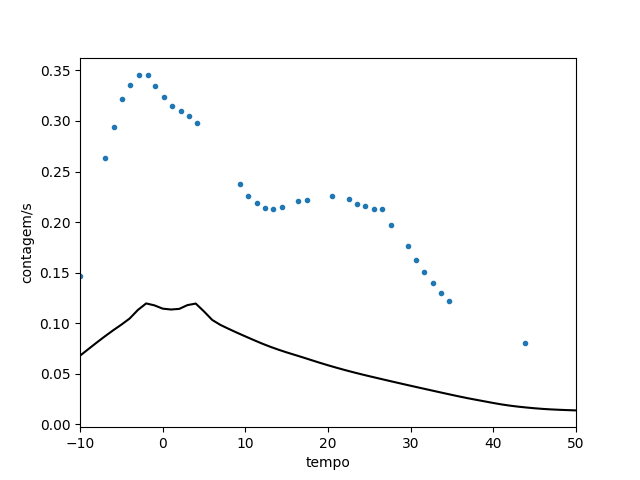

In [27]:
%matplotlib notebook
plt.plot(x_plot, z_plot, 'k')
plt.errorbar(x_plot_dat, z_plot_dat, yerr=z_error_plot_dat, fmt='.')
plt.xlim(-10,50)
plt.xlabel("tempo")
plt.ylabel("contagem/s")
plt.show()

In [10]:
x_dat

array([270.704364, 271.720064, 272.735764, 275.813335, 276.829035,
       277.834578, 278.819807, 279.845664, 284.914007, 285.929707,
       292.074692, 293.090392, 294.116249, 295.131949, 296.127335,
       297.143035, 299.12365 , 300.13935 , 303.216921, 305.228007,
       306.243707, 307.259407, 308.275107, 309.300964, 310.306507,
       312.378535, 313.363764, 314.369307, 315.395164, 316.410864,
       317.416407, 326.588178, 334.703621, 346.902178, 270.704364,
       271.720064, 272.735764, 275.813335, 276.829035, 277.834578,
       278.819807, 279.845664, 280.922306, 284.914007, 285.929707,
       292.074692, 293.090392, 294.116249, 295.131949, 296.127335,
       297.143035, 299.12365 , 300.13935 , 303.216921, 305.228007,
       306.243707, 307.259407, 308.275107, 309.300964, 310.306507,
       312.378535, 313.363764, 314.369307, 315.395164, 316.410864,
       317.416407, 326.588178, 334.703621, 346.902178, 270.704364,
       271.720064, 272.735764, 275.813335, 276.829035, 277.834